# **Proyek Machine Learning – Khansa Maritza A**

# **Latar Belakang**
Penyakit jantung merupakan penyebab kematian tertinggi di dunia, dengan lebih dari 17,9 juta kasus setiap tahun (WHO, 2023). Gaya hidup modern, stres, dan dampak COVID-19 turut memperburuk kondisi ini, bahkan di usia produktif (Sahoo & Jeripothula, 2020). Deteksi dini menjadi penting untuk mencegah komplikasi serius, namun prosesnya masih kompleks dan membutuhkan sistem prediksi yang akurat.

Dengan dukungan data kesehatan dan perkembangan machine learning (ML), prediksi risiko penyakit jantung kini dapat dilakukan lebih efektif. Penelitian oleh Gandla et al. (2023) dan Sahoo & Jeripothula (2020) menunjukkan bahwa algoritma seperti SVM, Random Forest, dan Logistic Regression mampu menghasilkan prediksi yang baik pada dataset UCI.

Referensi:
- World Health Organization. (2023). Cardiovascular diseases (CVDs). Online at https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds), accessed 24 May 2025
- Gandla, V. R., Mallela, D. V., & Chaurasiya, R. (2023, June). Heart failure prediction using machine learning. In AIP Conference Proceedings (Vol. 2705, No. 1). AIP Publishing.
- Sahoo, P. K., & Jeripothula, P. (2020). Heart failure prediction using machine learning techniques. Available at SSRN 3759562.


# **Tujuan Proyek**
Proyek ini bertujuan membangun model ML untuk memprediksi risiko penyakit jantung berdasarkan data klinis pasien sebagai upaya deteksi dini dan dukungan pengambilan keputusan medis.



# **Impor Dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import randint, uniform

# **Load Dataset**

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khansartz","key":"45499645474f1473e896fe62629d1776"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction
!unzip heart-failure-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
License(s): ODbL-1.0
  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 34.8MB/s]
Archive:  heart-failure-prediction.zip
  inflating: heart.csv               


# **Exploratory Data Analysis**
## **1. Memuat Dataset**
Dataset dimuat dari file CSV bernama `heart.csv` ke dalam DataFrame menggunakan `pandas`. Setelah dimuat, dilakukan pengecekan awal menggunakan `df.head()` untuk melihat beberapa data pertama.

In [5]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## **2. Menampilkan Informasi Dataset**

Fungsi `df.info()` digunakan untuk menampilkan ringkasan struktur dataset:

- Total terdapat 918 data dan 12 kolom.
- Tidak terdapat nilai yang hilang (non-null semua).
- Beberapa kolom bertipe numerik (int64, float64), dan beberapa lainnya bertipe kategorikal (object).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##**3. Duplikasi dan Missing Values**
Dilakukan pengecekan data duplikat dan nilai hilang.
- Tidak ditemukan data duplikat.
- Semua kolom tidak memiliki nilai yang hilang (missing value).

In [7]:
print("Jumlah duplikasi: ", df.duplicated().sum())
print("Missing value per kolom: \n",df.isna().sum())

Jumlah duplikasi:  0
Missing value per kolom: 
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


## **4. Statistik Deskriptif**
Statistik Fitur Numerik
Fungsi df.describe() digunakan untuk menampilkan statistik ringkasan seperti:
- Rata-rata, nilai maksimum, minimum, dan kuartil dari fitur numerik seperti `Age`, `Cholesterol`, `RestingBP`, dan lainnya.

In [8]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


## **5. Visualisasi Boxplot (Deteksi Outlier)**
Boxplot dibuat untuk fitur numerik `Age`, `RestingBP`, `Cholesterol`, `MaxHR`, dan `Oldpeak` untuk melihat distribusi data serta mendeteksi keberadaan outlier.

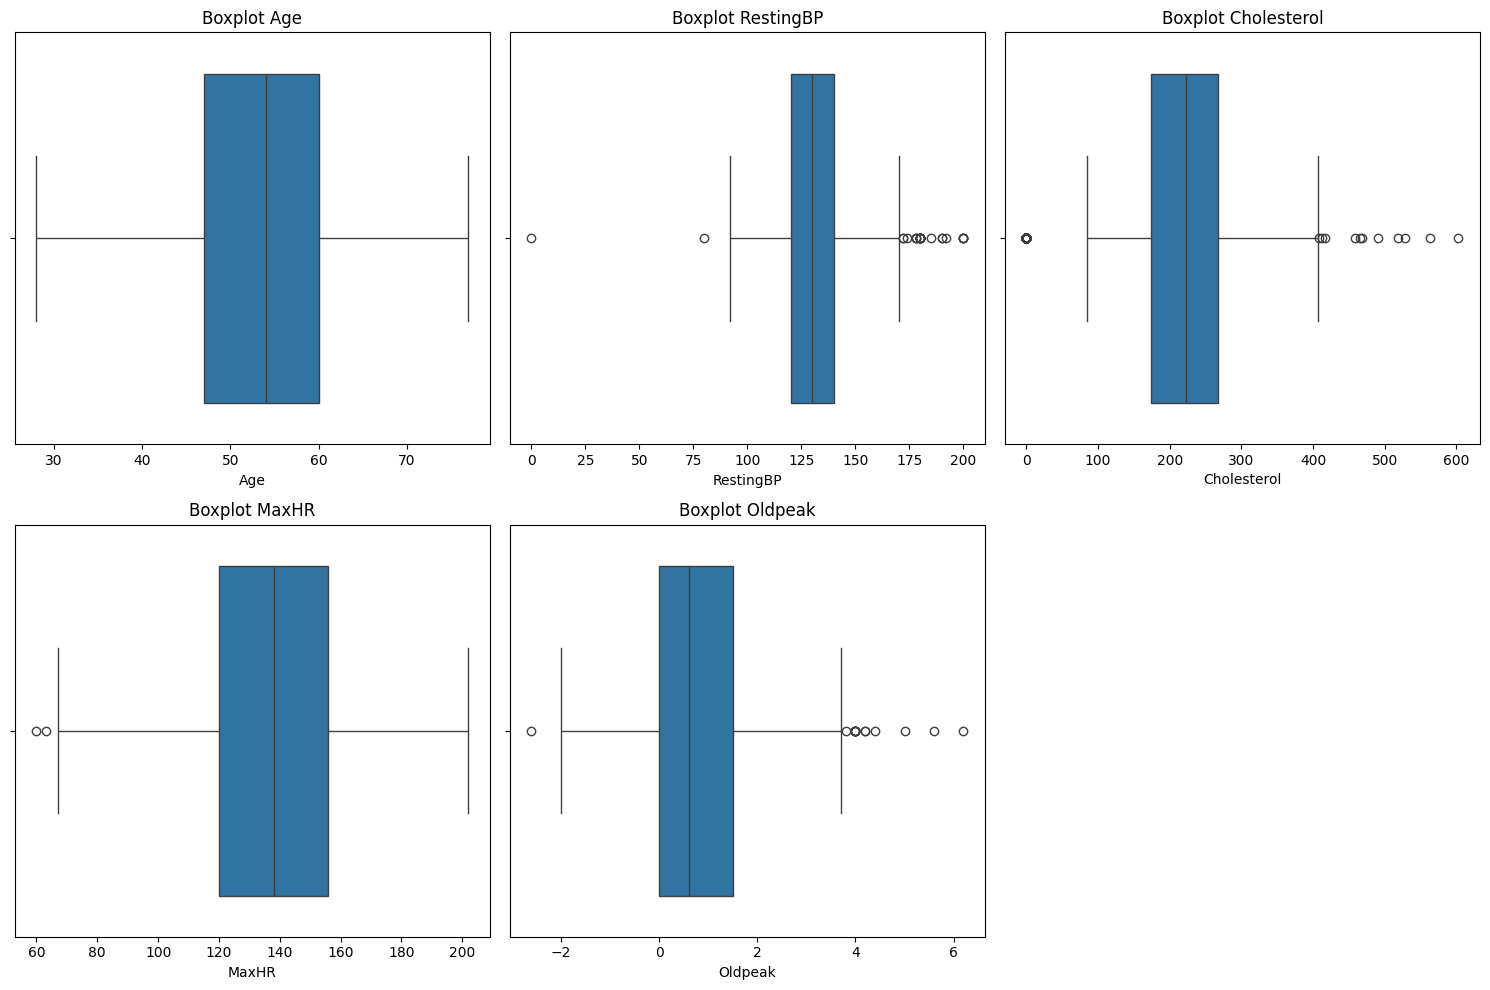

In [9]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

## **6. Mengatasi Outlie**r
Outlier diatasi dengan metode IQR (Interquartile Range), di mana nilai yang lebih kecil dari batas bawah atau lebih besar dari batas atas akan di-clip ke dalam rentang normal.

In [10]:
for column in num_cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    df[column] = df[column].clip(lb, ub)

In [11]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.125272,203.985158,0.233115,136.819172,0.877778,0.553377
std,9.432617,16.993314,95.922341,0.423046,25.432057,1.031693,0.497414
min,28.000000,90.000000,32.625000,0.000000,66.000000,-2.250000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,407.625000,1.000000,202.000000,3.750000,1.000000


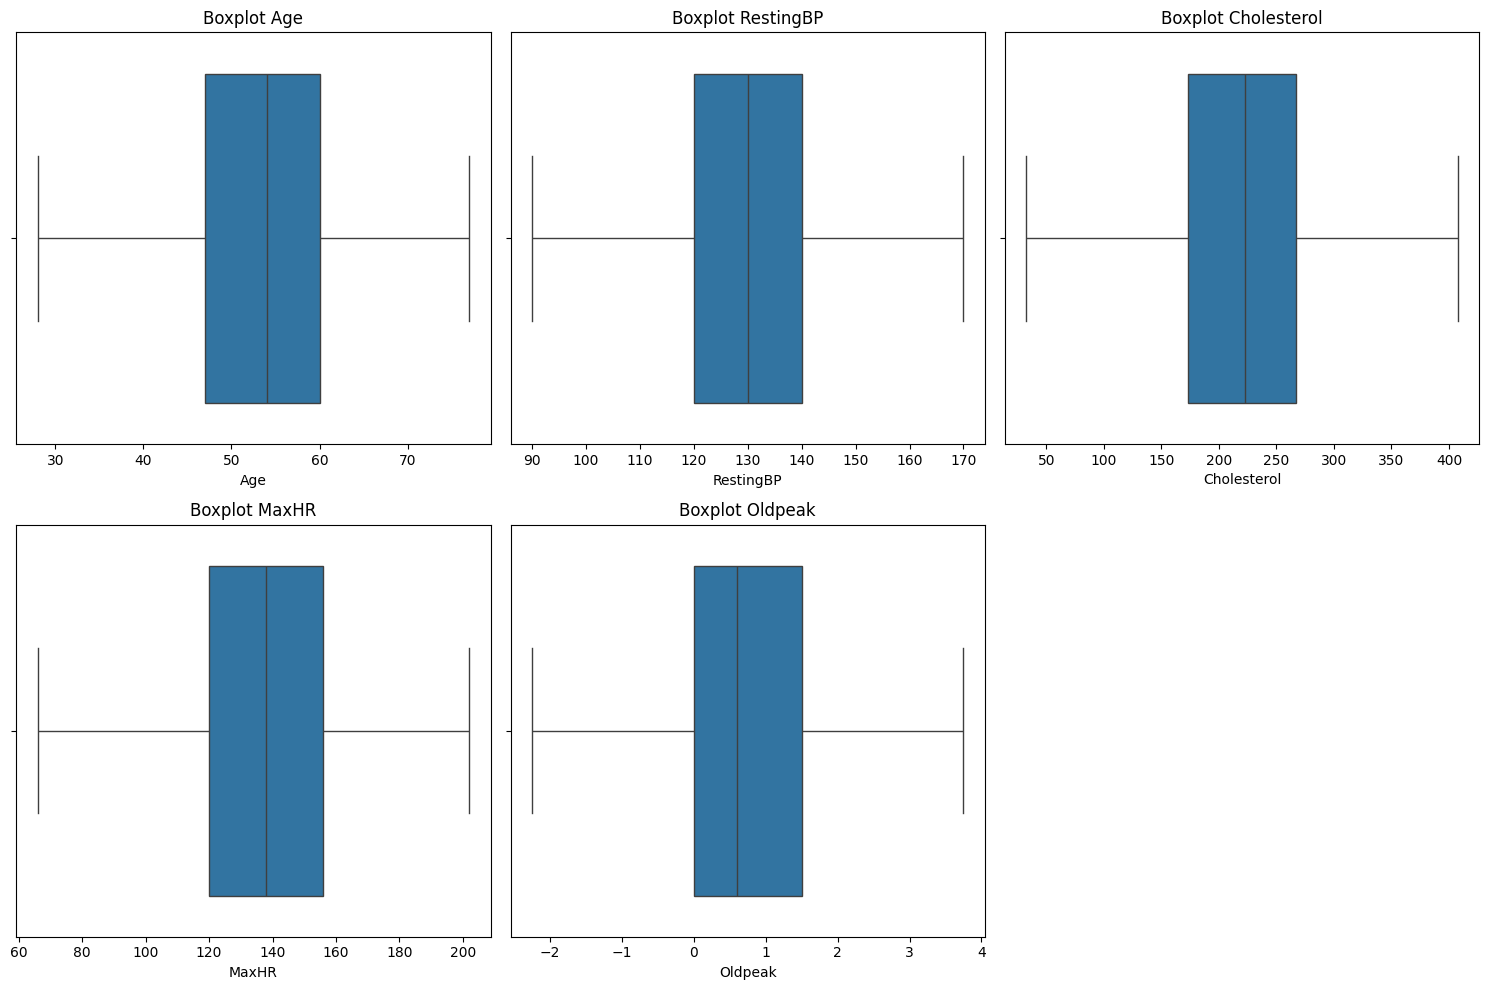

In [12]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

## **7. Eksplorasi Fitur Kategorikal**
Visualisasi dilakukan untuk fitur kategorikal seperti `Sex`, `ChestPainType`, `RestingECG`, `ExerciseAngina`, dan `ST_Slope`. Ditampilkan jumlah dan persentase distribusi tiap kategori, serta grafik batangnya.


Feature: Sex
     jumlah sampel  persentase (%)
Sex                               
M              725            79.0
F              193            21.0


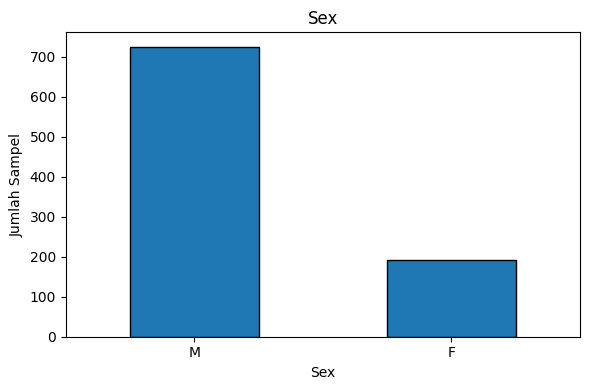


Feature: ChestPainType
               jumlah sampel  persentase (%)
ChestPainType                               
ASY                      496            54.0
NAP                      203            22.1
ATA                      173            18.8
TA                        46             5.0


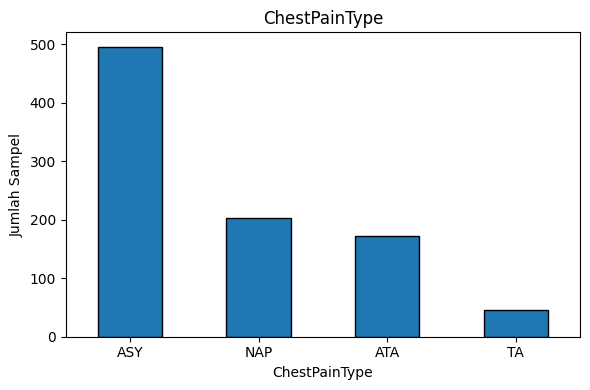


Feature: RestingECG
            jumlah sampel  persentase (%)
RestingECG                               
Normal                552            60.1
LVH                   188            20.5
ST                    178            19.4


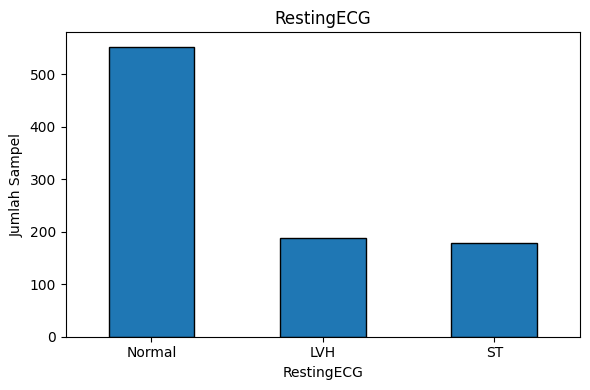


Feature: ExerciseAngina
                jumlah sampel  persentase (%)
ExerciseAngina                               
N                         547            59.6
Y                         371            40.4


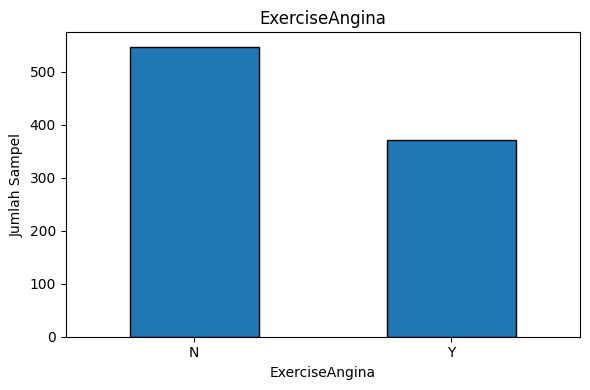


Feature: ST_Slope
          jumlah sampel  persentase (%)
ST_Slope                               
Flat                460            50.1
Up                  395            43.0
Down                 63             6.9


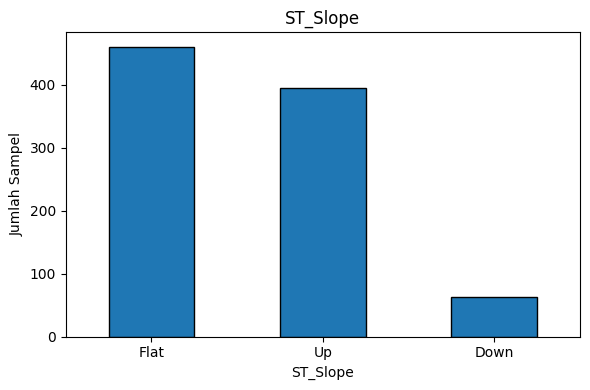

In [13]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina','ST_Slope']

for feature in categorical_features:
    count = df[feature].value_counts()
    percent = 100 * df[feature].value_counts(normalize=True)
    summary_df = pd.DataFrame({
        'jumlah sampel': count,
        'persentase (%)': percent.round(1)
    })

    print(f'\nFeature: {feature}')
    print(summary_df)

    plt.figure(figsize=(6, 4))
    count.plot(kind='bar', title=feature, edgecolor='black')
    plt.ylabel('Jumlah Sampel')
    plt.xlabel(feature)
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

## **8. Visualisasi Distribusi Seluruh Fitur Numerik**
Histogram ditampilkan untuk semua kolom numerik untuk melihat persebaran data masing-masing fitur.

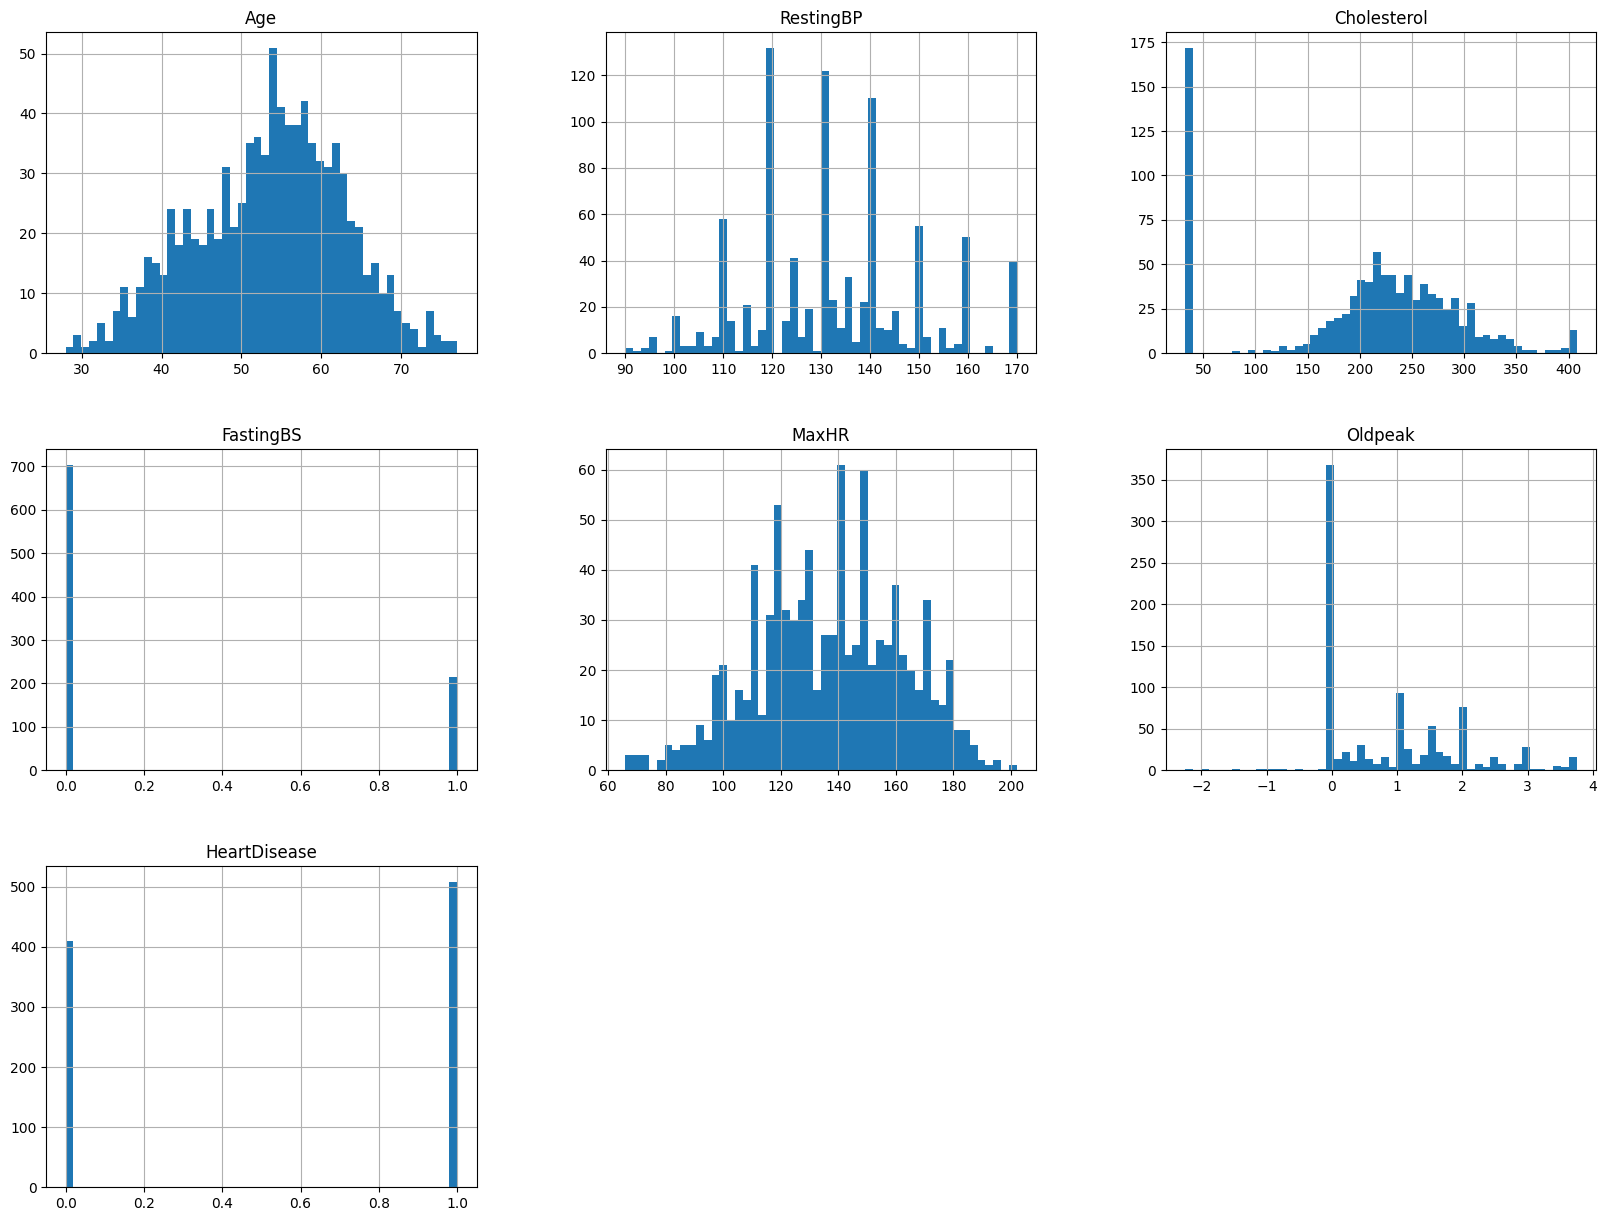

In [14]:
df.hist(bins=50, figsize=(20,15))
plt.show()

## **9. Hubungan Fitur Kategorikal dengan Target**
Visualisasi hubungan antara masing-masing fitur kategorikal dengan target `HeartDisease`. Menggunakan catplot untuk melihat rata-rata tingkat kejadian penyakit jantung per kategori.

<ipython-input-15-a23d650e8865>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set2")
<ipython-input-15-a23d650e8865>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set2")
<ipython-input-15-a23d650e8865>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set2")
<ipython-input-15-a

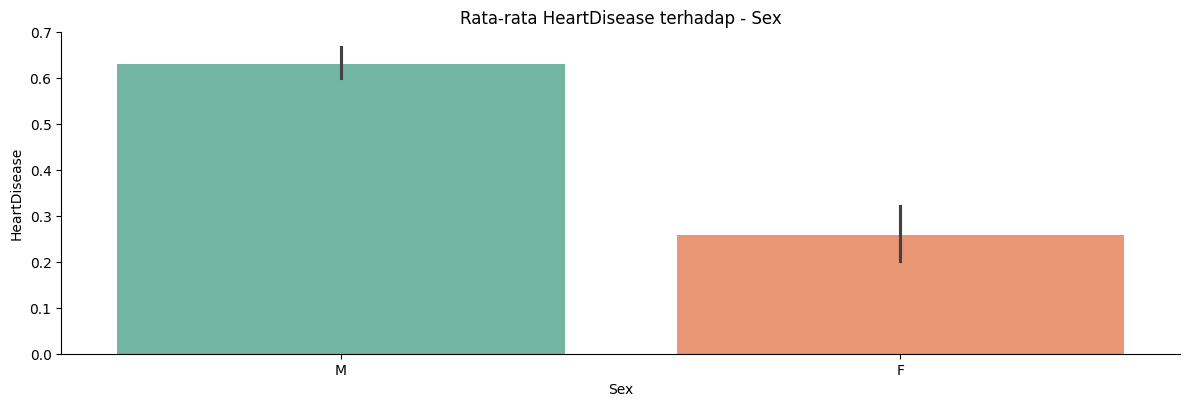

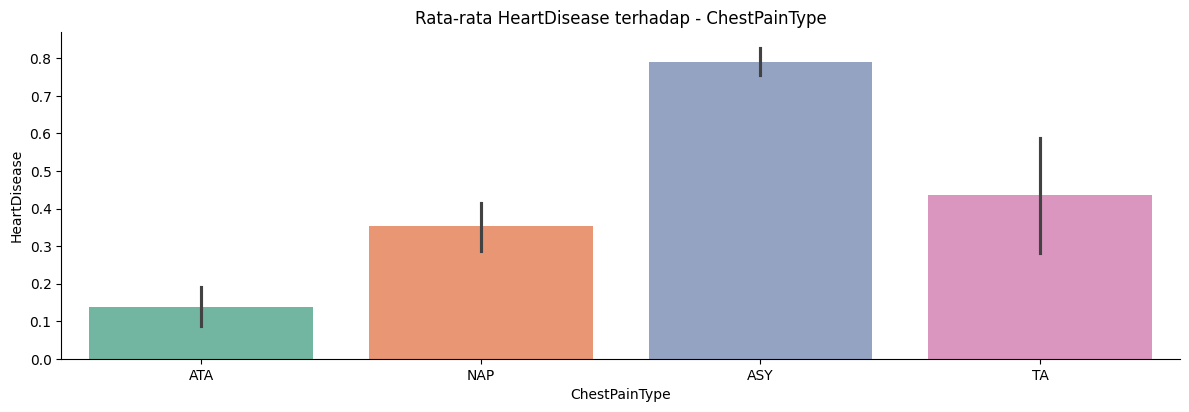

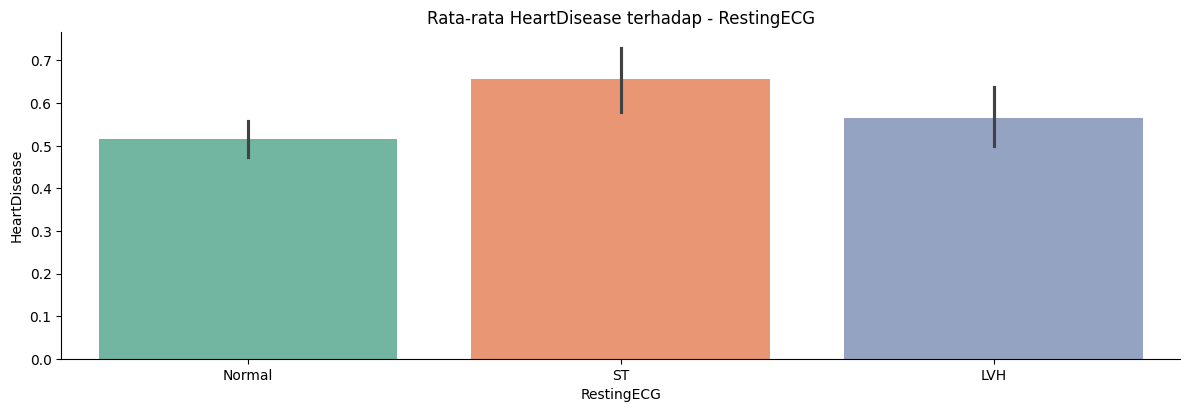

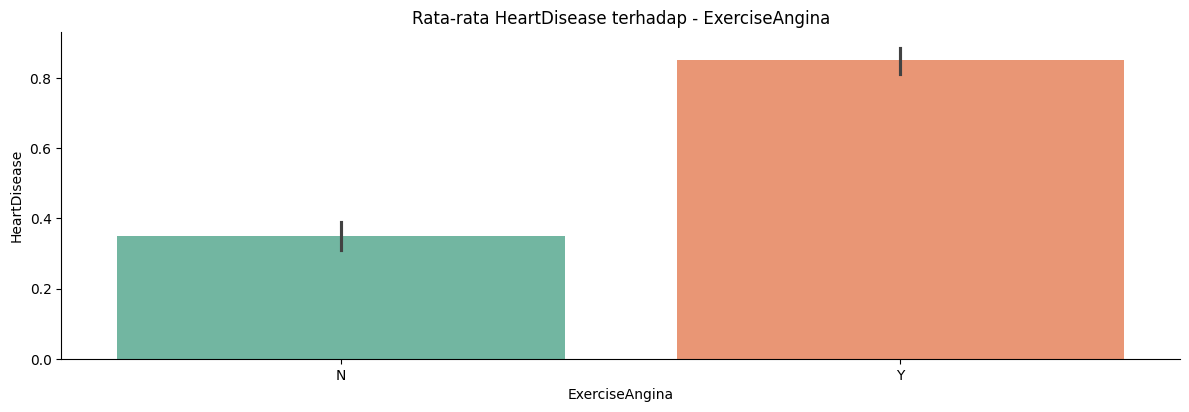

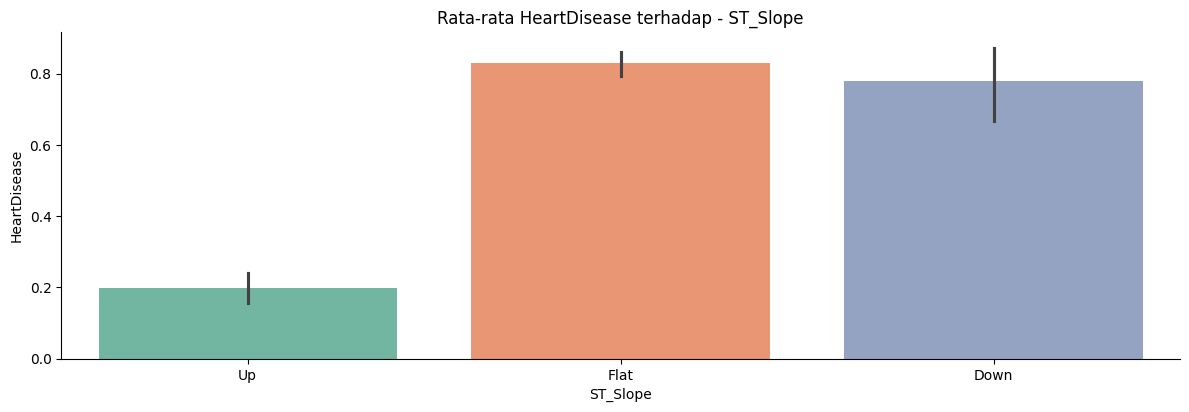

In [15]:
cat_features = df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    sns.catplot(x=col, y="HeartDisease", kind="bar", dodge=False, height=4, aspect=3, data=df, palette="Set2")
    plt.title(f"Rata-rata HeartDisease terhadap - {col}")

## **10. Korelasi Antar Fitur Numerik**
**Correlation Matrix** membuat heatmap korelasi antar fitur numerik untuk memahami hubungan linear antar fitur. Korelasi yang tinggi bisa menunjukkan adanya keterkaitan kuat antara dua fitur.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

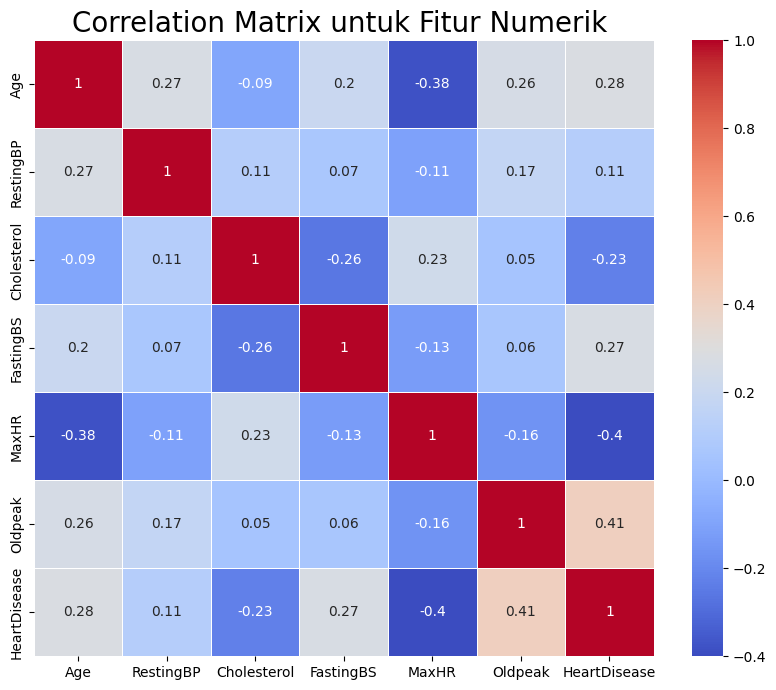

In [16]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

Heatmap menunjukkan hubungan antar fitur numerik, khususnya terhadap variabel target `HeartDisease`.

- **Oldpeak (0.41)** memiliki korelasi positif tertinggi dengan `HeartDisease`, artinya semakin tinggi nilai Oldpeak, semakin besar risiko penyakit jantung.
- **MaxHR (-0.40)** berkorelasi negatif kuat, menunjukkan bahwa detak jantung maksimum yang rendah berhubungan dengan risiko lebih tinggi.
- **Age (0.28)** dan **FastingBS (0.27)** juga memiliki korelasi positif sedang terhadap penyakit jantung.
- Fitur lain seperti **RestingBP (0.11)** dan **Cholesterol (-0.23)** memiliki korelasi lemah terhadap target.

Korelasi antar fitur juga terlihat, seperti **Age dan MaxHR (-0.38)**, yang menunjukkan penurunan detak jantung maksimum seiring bertambahnya usia.

Secara keseluruhan, fitur `Oldpeak`, `MaxHR`, dan `Age` layak menjadi fokus dalam pemodelan karena korelasinya yang cukup kuat dengan target.


## **10. Encoding Fitur Kategori**

Fitur kategorikal diubah menjadi format numerik menggunakan teknik One-Hot Encoding. Dengan `drop_first=True`, satu kategori dari tiap fitur di-drop untuk menghindari multikolinearitas. Hasilnya disimpan dalam `df_encoded`.


In [17]:
# List fitur kategorikal
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Lakukan One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_features, prefix=categorical_features, drop_first=True, dtype=int)

df_encoded.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289.0,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180.0,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283.0,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214.0,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195.0,0,122,0.0,0,1,0,1,0,1,0,0,0,1


## **11. Pembagian Data (Train-Test Split)**

Dataset dibagi menjadi data latih (80%) dan data uji (20%) menggunakan fungsi `train_test_split`. Ini bertujuan agar model dapat dilatih dan dievaluasi secara adil terhadap data yang belum pernah dilihat sebelumnya.

In [18]:
from sklearn.model_selection import train_test_split

# Pakai data yang udah di-encode
X = df_encoded.drop("HeartDisease", axis=1)
y = df_encoded["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

print(f'Total jumlah sampel di dataset: {len(X)}')
print(f'Jumlah sampel di data latih (train): {len(X_train)}')
print(f'Jumlah sampel di data uji (test): {len(X_test)}')

Total jumlah sampel di dataset: 918
Jumlah sampel di data latih (train): 734
Jumlah sampel di data uji (test): 184


## **12. Standarisasi Fitur Numerik**

Fitur numerik dinormalisasi menggunakan `StandardScaler` agar memiliki rata-rata 0 dan standar deviasi 1. Proses ini penting agar model tidak bias terhadap fitur dengan skala besar.

In [19]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']  # tanpa 'HeartDisease'

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [20]:
X_train[numerical_features].describe().round(4)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
count,734.0000,734.0000,734.0000,734.0000,734.0000,734.0000
mean,-0.0000,0.0000,0.0000,-0.0000,0.0000,-0.0000
std,1.0007,1.0007,1.0007,1.0007,1.0007,1.0007
min,-2.6618,-2.5040,-1.7416,-0.5280,-2.8444,-2.9999
25%,-0.7669,-0.7177,-0.3205,-0.5280,-0.6981,-0.8537
50%,0.0753,-0.1223,0.1967,-0.5280,0.0571,-0.2814
75%,0.7069,0.4732,0.6596,-0.5280,0.7725,0.5771
max,2.4966,2.2595,2.1375,1.8941,2.5611,2.7233


# **Modeling**

Beberapa algoritma klasifikasi diterapkan, yaitu Logistic Regression, Random Forest, Gradient Boosting, AdaBoost, dan SVM. Hyperparameter tuning dilakukan menggunakan `RandomizedSearchCV`. Hasil evaluasi mencakup akurasi, presisi, recall, dan F1-score, yang kemudian ditampilkan dalam bentuk tabel. Confusion matrix juga divisualisasikan untuk setiap model.

## **1. Setup model dan parameter untuk tuning**

In [21]:
models_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=10000, random_state=42),
        "params": {
            "C": uniform(0.01, 10),
            "solver": ['lbfgs', 'saga']
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": randint(50, 300),
            "max_depth": randint(3, 20),
            "min_samples_split": randint(2, 10),
            "min_samples_leaf": randint(1, 10),
            "max_features": ['sqrt', 'log2', None]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": randint(50, 300),
            "learning_rate": uniform(0.01, 0.3),
            "max_depth": randint(3, 10)
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "n_estimators": randint(50, 300),
            "learning_rate": uniform(0.01, 1.0)
        }
    },
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": uniform(0.1, 10),
            "kernel": ['rbf'],
            "gamma": ['scale', 'auto']
        }
    }
}

## **2. Tuning + Evaluasi + Simpan hasil**

In [22]:
results = []
tuned_models = {}

for name, mp in models_params.items():
    print(f"🔍 Tuning {name}...")
    search = RandomizedSearchCV(
        mp["model"],
        mp["params"],
        n_iter=20,
        scoring='f1',
        cv=5,
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    tuned_models[name] = best_model

    y_pred = best_model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1-score": round(f1, 4),
        "Best Params": search.best_params_
    })

🔍 Tuning Logistic Regression...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Tuning Random Forest...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Tuning Gradient Boosting...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Tuning AdaBoost...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
🔍 Tuning SVM...
Fitting 5 folds for each of 20 candidates, totalling 100 fits


## **3. Evaluasi Model**



In [23]:
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print(results_df)

                 Model  Accuracy  Precision  Recall  F1-score  \
1        Random Forest    0.8641     0.8545  0.9126    0.8826   
3             AdaBoost    0.8587     0.8407  0.9223    0.8796   
0  Logistic Regression    0.8478     0.8378  0.9029    0.8692   
2    Gradient Boosting    0.8478     0.8440  0.8932    0.8679   
4                  SVM    0.8478     0.8378  0.9029    0.8692   

                                         Best Params  
1  {'max_depth': 15, 'max_features': 'sqrt', 'min...  
3  {'learning_rate': 0.3845401188473625, 'n_estim...  
0        {'C': 0.5741157902710026, 'solver': 'saga'}  
2  {'learning_rate': 0.12562495076197483, 'max_de...  
4  {'C': 5.242344384136116, 'gamma': 'auto', 'ker...  


Berdasarkan hasil evaluasi, model **Random Forest** memiliki performa terbaik dengan akurasi 86.41% dan F1-score 88.26%. Model **AdaBoost** juga menunjukkan kinerja yang kompetitif dengan F1-score tertinggi sebesar 87.96%. Seluruh model memiliki recall di atas 90%, menunjukkan kemampuan yang baik dalam mendeteksi kasus positif (HeartDisease). Parameter terbaik untuk masing-masing model diperoleh melalui tuning dengan `RandomizedSearchCV`.

Model Random Forest dan AdaBoost menunjukkan performa terbaik, khususnya pada recall dan F1-score, yang menjadi metrik utama dalam konteks klasifikasi penyakit. Model dengan recall tinggi lebih diutamakan karena lebih sedikit melewatkan kasus positif (penderita penyakit jantung).


## **4. Visualisasi confusion matrix**

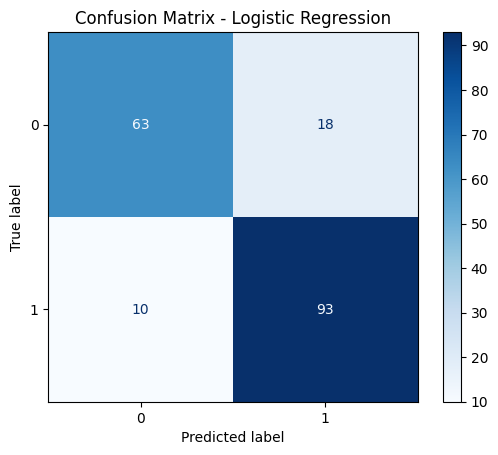

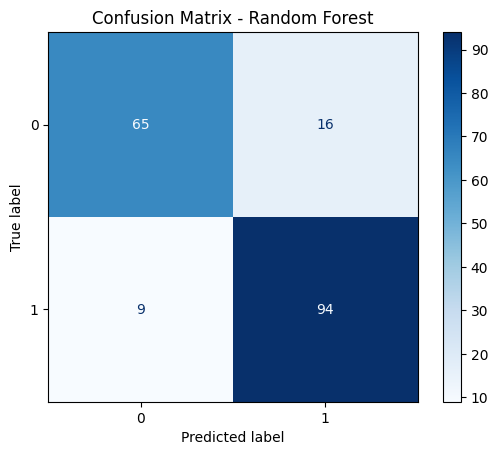

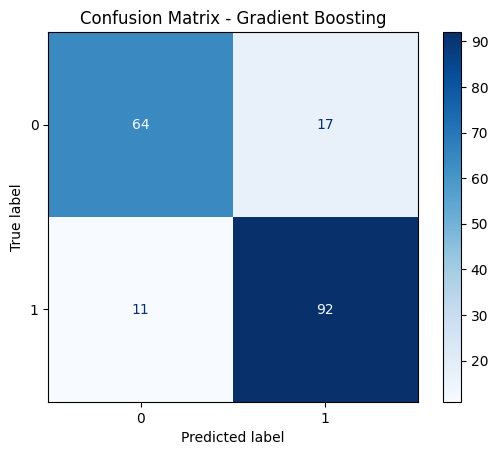

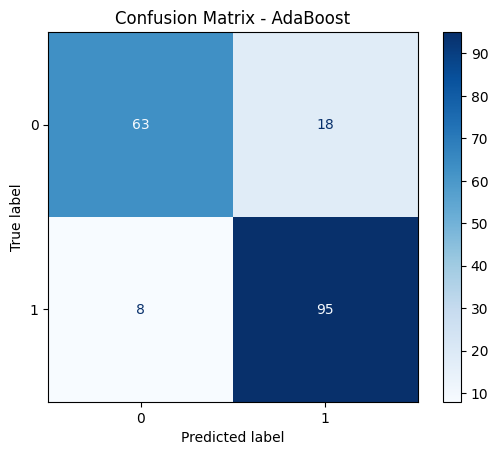

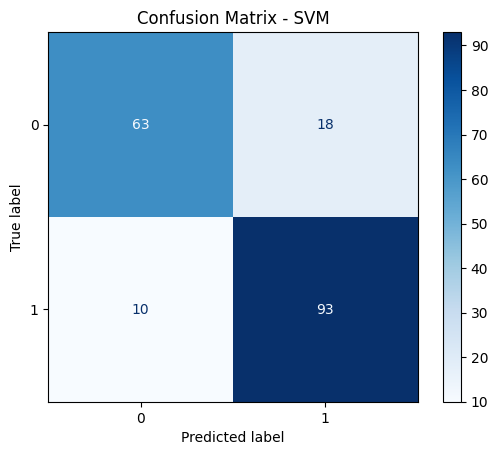

In [24]:
for name, model in tuned_models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

### **Analisis Confusion Matrix**
1. Logistic Regression menunjukkan kinerja yang cukup baik, dengan jumlah FN yang relatif rendah, meskipun jumlah FP masih cukup tinggi.

2. Random Forest memiliki jumlah False Negative terendah kedua setelah AdaBoost, serta True Positive tertinggi, menunjukkan bahwa model ini cukup andal dalam mengidentifikasi pasien berisiko. Hal ini terlihat dari nilai recall dan F1-score yang tinggi.

3. Gradient Boosting memiliki performa yang cukup seimbang, meskipun jumlah FN dan FP sedikit lebih tinggi dibanding Random Forest dan AdaBoost. Hal ini mengindikasikan model ini sedikit lebih longgar dalam klasifikasinya.

4. AdaBoost memiliki jumlah False Negative paling rendah (8 kasus), yang berarti model ini paling sedikit melewatkan pasien yang benar-benar berisiko. Ini menjadikannya sangat relevan untuk digunakan dalam konteks prediksi kesehatan, di mana kesalahan dalam mendeteksi kasus positif bisa berdampak serius.

5. Support Vector Machine (SVM) menunjukkan pola hasil yang identik dengan Logistic Regression, dengan jumlah FN dan FP yang sama. Artinya, dari sisi kesalahan klasifikasi, kinerjanya cukup mirip.


# **Kesimpulan**
Dilihat dari keseluruhan analisis dan mempertimbangkan pentingnya mengurangi False Negative dalam konteks kesehatan, **AdaBoost** menjadi kandidat terbaik untuk digunakan, diikuti oleh Random Forest. Kedua model ini menunjukkan kemampuan tinggi dalam mendeteksi pasien berisiko tanpa terlalu banyak menghasilkan prediksi false positif.
Meskipun akurasi Random Forest lebih tinggi, AdaBoost dipilih karena memiliki recall tertinggi dan false negative paling rendah. Hal ini penting dalam prediksi penyakit jantung karena lebih baik mendeteksi semua pasien berisiko daripada melewatkan yang positif.
